In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,r2_score,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Import of Datasets

In [2]:
df_raquel = pd.read_csv('raquel.csv',delimiter=",")
df_santejo = pd.read_csv('santejo.csv',delimiter=",")
df_luis = pd.read_csv('luis.csv',delimiter=',')

In [3]:
df_raquel=df_raquel.rename(columns = {'Unnamed: 0':'Day'})
df_santejo=df_santejo.rename(columns = {'Unnamed: 0':'Day'})
df_luis=df_luis.rename(columns = {'Unnamed: 0':'Day'})

In [4]:
# Add column with the user id at the beginning of dataframes
df_raquel.insert(0, 'User_id', 1)
df_santejo.insert(0, 'User_id', 2)
df_luis.insert(0, 'User_id', 3)

In [5]:
## Change target column to the end of dataframes
df_aux = df_raquel.pop('Sleep quality')
df_raquel['Sleep quality'] = df_aux

df_aux = df_santejo.pop('Sleep quality')
df_santejo['Sleep quality'] = df_aux

df_aux = df_luis.pop('Sleep quality')
df_luis['Sleep quality'] = df_aux

In [6]:
# Data starts on day 1
df_raquel['Day'] += 1
df_santejo['Day'] += 1
df_luis['Day'] += 1

In [7]:
df_raquel.head() 

,User_id,Day,Activity_Time,Brightness,Light,End_Time,Activity_Time(last 2 hours),Start_SleepTime,Brightness(last 2 hours),Light(last 2 hours),End_SleepTime,Awake,Sleep,Out_Of_Bed,Light_Sleep,Deep_Sleep,REM,Total_Hours,Sleep quality
0,1,1,0 days 01:54:31.036000,38.0,18.0,2022-04-25 09:39:22.910000+01:00,0 days 00:39:34.043000,2022-04-25 03:09:14,57.5,31.5,2022-04-25 09:32:35,0 days 00:04:21,0 days,0 days,0 days 01:39:00,0 days 03:40:00,0 days 01:00:00,0 days 06:19:00,1.5
1,1,2,0 days 02:23:31.996000,48.0,14.0,2022-04-27 12:34:23+01:00,0 days 01:09:39.363000,2022-04-27 00:53:00,26.0,1.0,2022-04-27 08:15:00,0 days 00:00:00,0 days,0 days,0 days 05:55:00,0 days 01:27:00,0 days 00:00:00,0 days 07:22:00,3.0
2,1,3,0 days 02:25:28.570000,46.5,3.5,2022-04-28 11:26:14.570000+01:00,0 days 01:08:02.314000,2022-04-28 02:49:00,41.0,14.0,2022-04-28 10:26:00,0 days 00:00:00,0 days,0 days,0 days 07:15:00,0 days 00:22:00,0 days 00:00:00,0 days 07:37:00,4.0
3,1,4,0 days 05:17:11.577000,41.0,10.0,2022-04-29 14:04:07.688000+01:00,0 days 00:06:30.241000,2022-04-29 03:05:00,46.0,15.0,2022-04-29 14:04:00,0 days 00:25:00,0 days,0 days,0 days 09:02:00,0 days 01:32:00,0 days 00:00:00,0 days 10:34:00,2.5
4,1,5,0 days 01:04:33.555000,54.0,1.0,2022-04-30 11:15:38.285000+01:00,0 days 00:30:51.173000,2022-04-30 03:48:00,41.0,0.0,2022-04-30 10:19:00,0 days 00:00:00,0 days,0 days,0 days 05:01:00,0 days 01:30:00,0 days 00:00:00,0 days 06:31:00,4.0


In [8]:
df_santejo.head()

,User_id,Day,Activity_Time,Brightness,Light,End_Time,Activity_Time(last 2 hours),Start_SleepTime,Brightness(last 2 hours),Light(last 2 hours),End_SleepTime,Awake,Sleep,Out_Of_Bed,Light_Sleep,Deep_Sleep,REM,Total_Hours,Sleep quality
0,2,1,0 days 01:40:57.265000,694.0,4.995000,2022-04-25 10:00:43.639000+01:00,0 days 01:39:02.907000,2022-04-25 02:26:16,694.0,8.707500,2022-04-25 09:25:15,0 days 00:12:45,0 days,0 days,0 days 02:32:59,0 days 03:20:00,0 days 00:53:15,0 days 06:46:14,3.0
1,2,2,0 days 01:44:25.090000,924.0,12.555000,2022-04-26 08:11:20.498000+01:00,0 days 00:52:32.315000,2022-04-26 01:51:39,924.0,19.372501,2022-04-26 08:10:24,0 days 00:12:30,0 days,0 days,0 days 01:48:45,0 days 03:25:00,0 days 00:52:30,0 days 06:06:15,3.0
2,2,3,0 days 00:41:05.381000,1362.0,9.382501,2022-04-27 10:30:24.557000+01:00,0 days 00:38:46.378000,2022-04-26 22:20:26,1362.0,11.778750,2022-04-27 10:25:21,0 days 00:26:42,0 days,0 days,0 days 04:01:35,0 days 06:14:49,0 days 01:21:49,0 days 11:38:13,4.0
3,2,4,0 days 00:34:12.377000,22.0,0.000000,2022-04-30 09:16:03.080000+01:00,0 days 00:33:57.480000,2022-04-30 03:23:00,22.0,0.000000,2022-04-30 09:19:00,0 days 00:00:00,0 days,0 days,0 days 04:25:00,0 days 00:48:00,0 days 00:43:00,0 days 05:56:00,2.5
4,2,5,0 days 02:16:06.197000,963.0,6.480000,2022-05-01 14:27:03.313000+01:00,0 days 01:43:24.723000,2022-05-01 01:36:00,771.0,4.522500,2022-05-01 08:58:00,0 days 00:02:00,0 days,0 days,0 days 05:38:00,0 days 00:46:00,0 days 00:56:00,0 days 07:20:00,3.0


In [9]:
df_luis.head()

,User_id,Day,Activity_Time,Brightness,Light,End_Time,Activity_Time(last 2 hours),Start_SleepTime,Brightness(last 2 hours),Light(last 2 hours),End_SleepTime,Awake,Sleep,Out_Of_Bed,Light_Sleep,Deep_Sleep,REM,Total_Hours,Sleep quality
0,3,1,0 days 00:50:22.051000,33.0,25.0,2022-04-25 09:20:44.552000+01:00,0 days 00:21:27.844000,2022-04-25 01:53:00,33.0,25.5,2022-04-25 09:26:00,0 days 00:04:00,0 days,0 days,0 days 04:19:00,0 days 00:44:00,0 days 02:26:00,0 days 07:29:00,3.0
1,3,2,0 days 00:29:35.752000,40.0,2.5,2022-04-26 07:03:11.631000+01:00,0 days 00:27:40.686000,2022-04-25 22:57:00,67.0,43.0,2022-04-26 07:03:00,0 days 00:02:00,0 days,0 days,0 days 05:39:00,0 days 01:08:00,0 days 01:17:00,0 days 08:04:00,3.0
2,3,3,0 days 00:15:15.836000,50.5,0.0,2022-04-27 07:40:34.729000+01:00,0 days 00:14:56.337000,2022-04-26 21:52:00,62.0,0.0,2022-04-27 07:47:00,0 days 00:01:00,0 days,0 days,0 days 06:49:00,0 days 01:20:00,0 days 01:45:00,0 days 09:54:00,4.0
3,3,4,0 days 01:14:40.282000,68.0,43.5,2022-04-28 07:07:11.456000+01:00,0 days 01:14:40.282000,2022-04-28 00:20:00,68.0,48.0,2022-04-28 07:02:00,0 days 00:00:00,0 days,0 days,0 days 04:57:00,0 days 00:57:00,0 days 00:48:00,0 days 06:42:00,3.0
4,3,5,0 days 00:36:44.987000,66.0,24.0,2022-04-29 10:11:10.087000+01:00,0 days 00:02:50.217000,2022-04-29 02:33:00,65.0,26.0,2022-04-29 04:35:00,0 days 00:00:00,0 days,0 days,0 days 01:38:00,0 days 00:12:00,0 days 00:12:00,0 days 02:02:00,3.0


# Merge of Datasets

In [10]:
'''
data_vertical = pd.concat([data1b, data2b],    # Combine vertically
                          ignore_index = True,
                          sort = False)
print(data_vertical)  # Print combined DataFrame
'''

'\ndata_vertical = pd.concat([data1b, data2b],    # Combine vertically\n                          ignore_index = True,\n                          sort = False)\nprint(data_vertical)  # Print combined DataFrame\n'

In [11]:
# Concatenating multiple datasets into one
vertical_concat = pd.concat([df_raquel, df_santejo], axis=0)
df_final = pd.concat([vertical_concat, df_luis], axis=0)

In [12]:
df_final

,User_id,Day,Activity_Time,Brightness,Light,End_Time,Activity_Time(last 2 hours),Start_SleepTime,Brightness(last 2 hours),Light(last 2 hours),End_SleepTime,Awake,Sleep,Out_Of_Bed,Light_Sleep,Deep_Sleep,REM,Total_Hours,Sleep quality
0,1,1,0 days 01:54:31.036000,38.0,18.000000,2022-04-25 09:39:22.910000+01:00,0 days 00:39:34.043000,2022-04-25 03:09:14,57.5,31.500000,2022-04-25 09:32:35,0 days 00:04:21,0 days,0 days,0 days 01:39:00,0 days 03:40:00,0 days 01:00:00,0 days 06:19:00,1.5
1,1,2,0 days 02:23:31.996000,48.0,14.000000,2022-04-27 12:34:23+01:00,0 days 01:09:39.363000,2022-04-27 00:53:00,26.0,1.000000,2022-04-27 08:15:00,0 days 00:00:00,0 days,0 days,0 days 05:55:00,0 days 01:27:00,0 days 00:00:00,0 days 07:22:00,3.0
2,1,3,0 days 02:25:28.570000,46.5,3.500000,2022-04-28 11:26:14.570000+01:00,0 days 01:08:02.314000,2022-04-28 02:49:00,41.0,14.000000,2022-04-28 10:26:00,0 days 00:00:00,0 days,0 days,0 days 07:15:00,0 days 00:22:00,0 days 00:00:00,0 days 07:37:00,4.0
3,1,4,0 days 05:17:11.577000,41.0,10.000000,2022-04-29 14:04:07.688000+01:00,0 days 00:06:30.241000,2022-04-29 03:05:00,46.0,15.000000,2022-04-29 14:04:00,0 days 00:25:00,0 days,0 days,0 days 09:02:00,0 days 01:32:00,0 days 00:00:00,0 days 10:34:00,2.5
4,1,5,0 days 01:04:33.555000,54.0,1.000000,2022-04-30 11:15:38.285000+01:00,0 days 00:30:51.173000,2022-04-30 03:48:00,41.0,0.000000,2022-04-30 10:19:00,0 days 00:00:00,0 days,0 days,0 days 05:01:00,0 days 01:30:00,0 days 00:00:00,0 days 06:31:00,4.0
5,1,6,0 days 02:31:33.601000,44.0,9.000000,2022-05-02 08:22:12.429000+01:00,0 days 00:48:14.992000,2022-05-02 01:45:00,29.0,5.000000,2022-05-02 08:21:00,0 days 00:00:00,0 days,0 days,0 days 05:01:00,0 days 01:35:00,0 days 00:00:00,0 days 06:36:00,3.0
6,1,7,0 days 02:47:11.090000,43.0,8.000000,2022-05-03 08:00:26.795000+01:00,0 days 01:29:23.347000,2022-05-02 23:59:00,42.0,9.000000,2022-05-03 08:10:00,0 days 00:02:00,0 days,0 days,0 days 06:45:00,0 days 01:24:00,0 days 00:00:00,0 days 08:09:00,3.5
7,1,8,0 days 08:59:23.658000,60.0,13.000000,2022-05-04 09:50:52.658000+01:00,0 days 00:24:44.795000,2022-05-04 02:17:00,55.0,45.000000,2022-05-04 09:51:00,0 days 00:00:00,0 days,0 days,0 days 06:11:00,0 days 01:23:00,0 days 00:00:00,0 days 07:34:00,2.0
8,1,9,0 days 03:07:04.676000,45.0,20.000000,2022-05-05 11:21:57.190000+01:00,0 days 00:55:35.570000,2022-05-05 02:28:00,34.0,5.000000,2022-05-05 10:44:00,0 days 00:00:00,0 days,0 days,0 days 05:54:00,0 days 01:42:00,0 days 00:00:00,0 days 07:36:00,4.0
0,2,1,0 days 01:40:57.265000,694.0,4.995000,2022-04-25 10:00:43.639000+01:00,0 days 01:39:02.907000,2022-04-25 02:26:16,694.0,8.707500,2022-04-25 09:25:15,0 days 00:12:45,0 days,0 days,0 days 02:32:59,0 days 03:20:00,0 days 00:53:15,0 days 06:46:14,3.0


# Data Treatment

In [13]:
df_res = df_final.copy()

In [14]:
df_final

,User_id,Day,Activity_Time,Brightness,Light,End_Time,Activity_Time(last 2 hours),Start_SleepTime,Brightness(last 2 hours),Light(last 2 hours),End_SleepTime,Awake,Sleep,Out_Of_Bed,Light_Sleep,Deep_Sleep,REM,Total_Hours,Sleep quality
0,1,1,0 days 01:54:31.036000,38.0,18.000000,2022-04-25 09:39:22.910000+01:00,0 days 00:39:34.043000,2022-04-25 03:09:14,57.5,31.500000,2022-04-25 09:32:35,0 days 00:04:21,0 days,0 days,0 days 01:39:00,0 days 03:40:00,0 days 01:00:00,0 days 06:19:00,1.5
1,1,2,0 days 02:23:31.996000,48.0,14.000000,2022-04-27 12:34:23+01:00,0 days 01:09:39.363000,2022-04-27 00:53:00,26.0,1.000000,2022-04-27 08:15:00,0 days 00:00:00,0 days,0 days,0 days 05:55:00,0 days 01:27:00,0 days 00:00:00,0 days 07:22:00,3.0
2,1,3,0 days 02:25:28.570000,46.5,3.500000,2022-04-28 11:26:14.570000+01:00,0 days 01:08:02.314000,2022-04-28 02:49:00,41.0,14.000000,2022-04-28 10:26:00,0 days 00:00:00,0 days,0 days,0 days 07:15:00,0 days 00:22:00,0 days 00:00:00,0 days 07:37:00,4.0
3,1,4,0 days 05:17:11.577000,41.0,10.000000,2022-04-29 14:04:07.688000+01:00,0 days 00:06:30.241000,2022-04-29 03:05:00,46.0,15.000000,2022-04-29 14:04:00,0 days 00:25:00,0 days,0 days,0 days 09:02:00,0 days 01:32:00,0 days 00:00:00,0 days 10:34:00,2.5
4,1,5,0 days 01:04:33.555000,54.0,1.000000,2022-04-30 11:15:38.285000+01:00,0 days 00:30:51.173000,2022-04-30 03:48:00,41.0,0.000000,2022-04-30 10:19:00,0 days 00:00:00,0 days,0 days,0 days 05:01:00,0 days 01:30:00,0 days 00:00:00,0 days 06:31:00,4.0
5,1,6,0 days 02:31:33.601000,44.0,9.000000,2022-05-02 08:22:12.429000+01:00,0 days 00:48:14.992000,2022-05-02 01:45:00,29.0,5.000000,2022-05-02 08:21:00,0 days 00:00:00,0 days,0 days,0 days 05:01:00,0 days 01:35:00,0 days 00:00:00,0 days 06:36:00,3.0
6,1,7,0 days 02:47:11.090000,43.0,8.000000,2022-05-03 08:00:26.795000+01:00,0 days 01:29:23.347000,2022-05-02 23:59:00,42.0,9.000000,2022-05-03 08:10:00,0 days 00:02:00,0 days,0 days,0 days 06:45:00,0 days 01:24:00,0 days 00:00:00,0 days 08:09:00,3.5
7,1,8,0 days 08:59:23.658000,60.0,13.000000,2022-05-04 09:50:52.658000+01:00,0 days 00:24:44.795000,2022-05-04 02:17:00,55.0,45.000000,2022-05-04 09:51:00,0 days 00:00:00,0 days,0 days,0 days 06:11:00,0 days 01:23:00,0 days 00:00:00,0 days 07:34:00,2.0
8,1,9,0 days 03:07:04.676000,45.0,20.000000,2022-05-05 11:21:57.190000+01:00,0 days 00:55:35.570000,2022-05-05 02:28:00,34.0,5.000000,2022-05-05 10:44:00,0 days 00:00:00,0 days,0 days,0 days 05:54:00,0 days 01:42:00,0 days 00:00:00,0 days 07:36:00,4.0
0,2,1,0 days 01:40:57.265000,694.0,4.995000,2022-04-25 10:00:43.639000+01:00,0 days 01:39:02.907000,2022-04-25 02:26:16,694.0,8.707500,2022-04-25 09:25:15,0 days 00:12:45,0 days,0 days,0 days 02:32:59,0 days 03:20:00,0 days 00:53:15,0 days 06:46:14,3.0


### Colunas Temporais

In [15]:
# Activity Time to [Minutes]

x = pd.to_timedelta(df_res['Activity_Time'])

df_res['Activity_Time'] = x.dt.total_seconds().div(60).astype(int)

In [16]:
# Activity_Time(last 2 hours) to [Minutes]

x = pd.to_timedelta(df_res['Activity_Time(last 2 hours)'])

df_res['Activity_Time(last 2 hours)'] = x.dt.total_seconds().div(60).astype(int)

In [17]:
# Awake to [Minutes]

x = pd.to_timedelta(df_res['Awake'])

df_res['Awake'] = x.dt.total_seconds().div(60).astype(int)

In [18]:
# Light_Sleep to [Minutes]

x = pd.to_timedelta(df_res['Light_Sleep'])

df_res['Light_Sleep'] = x.dt.total_seconds().div(60).astype(int)

In [19]:
# Deep_Sleep to [Minutes]

x = pd.to_timedelta(df_res['Deep_Sleep'])

df_res['Deep_Sleep'] = x.dt.total_seconds().div(60).astype(int)

In [20]:
# REM to [Minutes]

x = pd.to_timedelta(df_res['REM'])

df_res['REM'] = x.dt.total_seconds().div(60).astype(int)

In [21]:
# Total_Hours to [Minutes]

x = pd.to_timedelta(df_res['Total_Hours'])

df_res['Total_Hours'] = x.dt.total_seconds().div(60).astype(int)

In [22]:
df_res.reset_index(inplace=True)
df_res.drop('index', axis=1, inplace=True)
df_res

,User_id,Day,Activity_Time,Brightness,Light,End_Time,Activity_Time(last 2 hours),Start_SleepTime,Brightness(last 2 hours),Light(last 2 hours),End_SleepTime,Awake,Sleep,Out_Of_Bed,Light_Sleep,Deep_Sleep,REM,Total_Hours,Sleep quality
0,1,1,114,38.0,18.000000,2022-04-25 09:39:22.910000+01:00,39,2022-04-25 03:09:14,57.5,31.500000,2022-04-25 09:32:35,4,0 days,0 days,99,220,60,379,1.5
1,1,2,143,48.0,14.000000,2022-04-27 12:34:23+01:00,69,2022-04-27 00:53:00,26.0,1.000000,2022-04-27 08:15:00,0,0 days,0 days,355,87,0,442,3.0
2,1,3,145,46.5,3.500000,2022-04-28 11:26:14.570000+01:00,68,2022-04-28 02:49:00,41.0,14.000000,2022-04-28 10:26:00,0,0 days,0 days,435,22,0,457,4.0
3,1,4,317,41.0,10.000000,2022-04-29 14:04:07.688000+01:00,6,2022-04-29 03:05:00,46.0,15.000000,2022-04-29 14:04:00,25,0 days,0 days,542,92,0,634,2.5
4,1,5,64,54.0,1.000000,2022-04-30 11:15:38.285000+01:00,30,2022-04-30 03:48:00,41.0,0.000000,2022-04-30 10:19:00,0,0 days,0 days,301,90,0,391,4.0
5,1,6,151,44.0,9.000000,2022-05-02 08:22:12.429000+01:00,48,2022-05-02 01:45:00,29.0,5.000000,2022-05-02 08:21:00,0,0 days,0 days,301,95,0,396,3.0
6,1,7,167,43.0,8.000000,2022-05-03 08:00:26.795000+01:00,89,2022-05-02 23:59:00,42.0,9.000000,2022-05-03 08:10:00,2,0 days,0 days,405,84,0,489,3.5
7,1,8,539,60.0,13.000000,2022-05-04 09:50:52.658000+01:00,24,2022-05-04 02:17:00,55.0,45.000000,2022-05-04 09:51:00,0,0 days,0 days,371,83,0,454,2.0
8,1,9,187,45.0,20.000000,2022-05-05 11:21:57.190000+01:00,55,2022-05-05 02:28:00,34.0,5.000000,2022-05-05 10:44:00,0,0 days,0 days,354,102,0,456,4.0
9,2,1,100,694.0,4.995000,2022-04-25 10:00:43.639000+01:00,99,2022-04-25 02:26:16,694.0,8.707500,2022-04-25 09:25:15,12,0 days,0 days,152,200,53,406,3.0


### Remoção Colunas a 0

In [23]:
# Dropping columns with constant value 0

df_res.drop('Sleep', axis=1, inplace=True)
df_res.drop('Out_Of_Bed', axis=1, inplace=True)

### Renomear Colunas

In [75]:
# Renomear Colunas
df_res.rename(columns = {'Activity_Time(last 2 hours)':'Activity_Time_2H',
                         'Brightness(last 2 hours)':'Brightness_2H',
                         'Light(last 2 hours)':'Light_2H',
                         'End_Time':'Rating_Time',
                         'Total_Hours':'Total_Minutes'}, inplace = True)

### Conversão Sleep Times em Várias Colunas

In [76]:
# Convert String objects to Datatime
df_res['Start_SleepTime'] = pd.to_datetime(df_res['Start_SleepTime'], errors='coerce')
df_res['End_SleepTime'] = pd.to_datetime(df_res['End_SleepTime'], errors='coerce')

In [77]:
#df_res['year'] = df_res['Start_SleepTime'].dt.year

In [78]:
# Rating_Time - AWARE
df_res.drop('Rating_Time', axis=1, inplace=True)
df_res.drop('Day', axis=1, inplace=True)

# Start_SleepTime - NAIVE

# day
df_res['Start_Sleep_Day'] = df_res['Start_SleepTime'].dt.day

# month
df_res['Start_Sleep_Month'] = df_res['Start_SleepTime'].dt.month

# hour
df_res['Start_Sleep_Hour'] = df_res['Start_SleepTime'].dt.hour

# minute
df_res['Start_Sleep_Minute'] = df_res['Start_SleepTime'].dt.minute


# End_SleepTime - NAIVE

# day
df_res['End_Sleep_Day'] = df_res['End_SleepTime'].dt.day

# month
df_res['End_Sleep_Month'] = df_res['End_SleepTime'].dt.month

# hour
df_res['End_Sleep_Hour'] = df_res['End_SleepTime'].dt.hour

# minute
df_res['End_Sleep_Minute'] = df_res['End_SleepTime'].dt.minute


#Drop of End_SleepTime and Start_SleepTime
df_res.drop('End_SleepTime', axis=1, inplace=True)
df_res.drop('Start_SleepTime', axis=1, inplace=True)

In [79]:
## Change target column to the end of dataframes
aux = df_res.pop('Sleep quality')
df_res['Sleep quality'] = aux

In [80]:
#df_res.reset_index(inplace=True)
#df_res.drop('index', axis=1, inplace=True)
df_res.head()

,User_id,Activity_Time,Brightness,Light,Activity_Time_2H,Brightness_2H,Light_2H,Awake,Light_Sleep,Deep_Sleep,...,Total_Minutes,Start_Sleep_Day,Start_Sleep_Month,Start_Sleep_Hour,Start_Sleep_Minute,End_Sleep_Day,End_Sleep_Month,End_Sleep_Hour,End_Sleep_Minute,Sleep quality
0,1,114,38.0,18.0,39,57.5,31.5,4,99,220,...,379,25,4,3,9,25,4,9,32,1.5
1,1,143,48.0,14.0,69,26.0,1.0,0,355,87,...,442,27,4,0,53,27,4,8,15,3.0
2,1,145,46.5,3.5,68,41.0,14.0,0,435,22,...,457,28,4,2,49,28,4,10,26,4.0
3,1,317,41.0,10.0,6,46.0,15.0,25,542,92,...,634,29,4,3,5,29,4,14,4,2.5
4,1,64,54.0,1.0,30,41.0,0.0,0,301,90,...,391,30,4,3,48,30,4,10,19,4.0


In [81]:
# Guardar dados para visualizar na aplicação

df_visualization = df_res.copy()

df_visualization.to_csv('finalData.csv')

# Data Visualization

### Matriz de Correlação

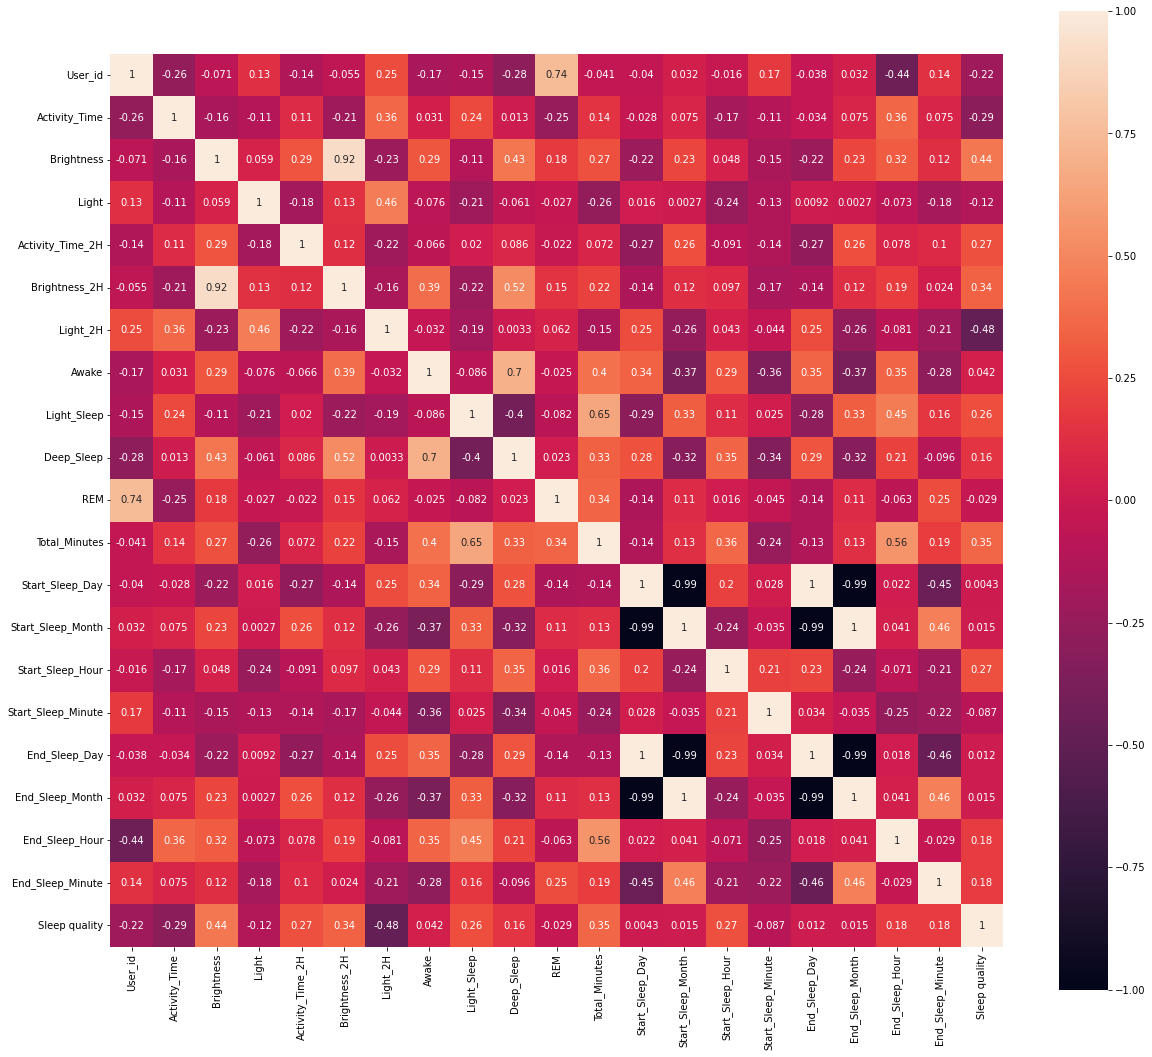

In [82]:
corr_matrix = df_res.corr()
f, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [83]:
from lets_plot import *
ggplot(df_res) + geom_point(aes(color="User_id", x="Activity_Time_2H", y="Deep_Sleep"))

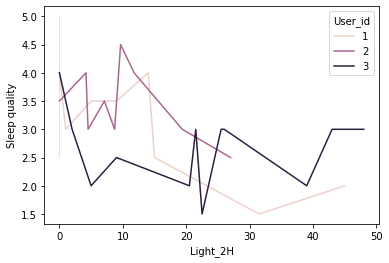

In [84]:
sns.lineplot(x="Light_2H",y="Sleep quality", hue="User_id", data=df_res)

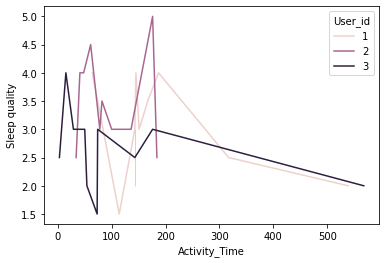

In [85]:
sns.lineplot(x="Activity_Time",y="Sleep quality",hue="User_id", data=df_res)

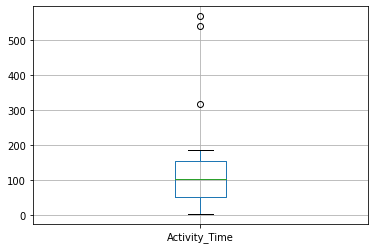

In [86]:
df_res.boxplot('Activity_Time')

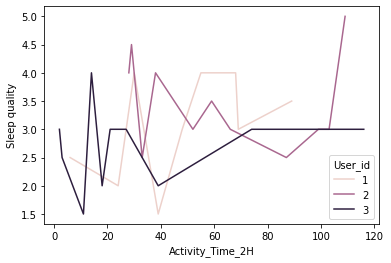

In [87]:
sns.lineplot(x="Activity_Time_2H",y="Sleep quality",hue="User_id",data=df_res)

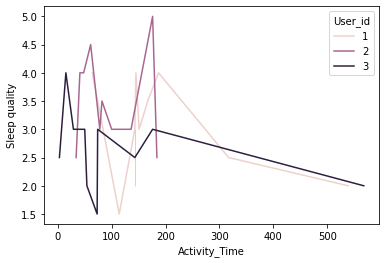

In [88]:
sns.lineplot(x="Activity_Time",y="Sleep quality",hue="User_id", data=df_res)
# outlier Luis : tela brincalhona

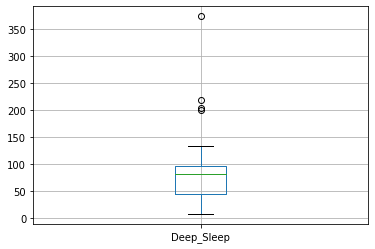

In [89]:
df_res.boxplot('Deep_Sleep')

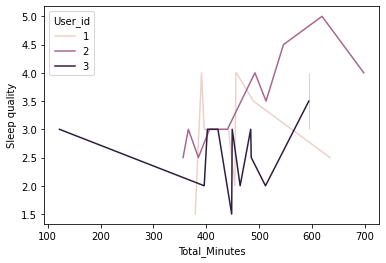

In [90]:
sns.lineplot(x="Total_Minutes", y="Sleep quality", hue="User_id", data=df_res)

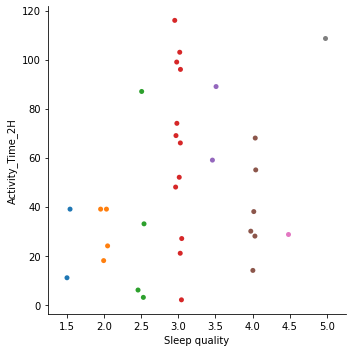

In [91]:
sns.catplot(x='Sleep quality', y="Activity_Time_2H", data=df_res)

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


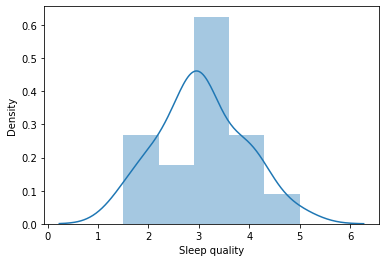

In [92]:
sns.distplot(df_res['Sleep quality'])

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


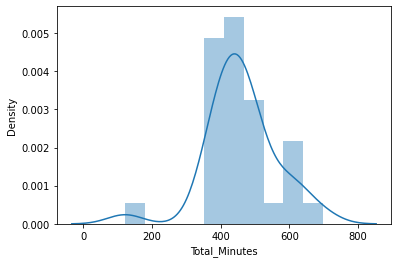

In [93]:
sns.distplot(df_res['Total_Minutes'])

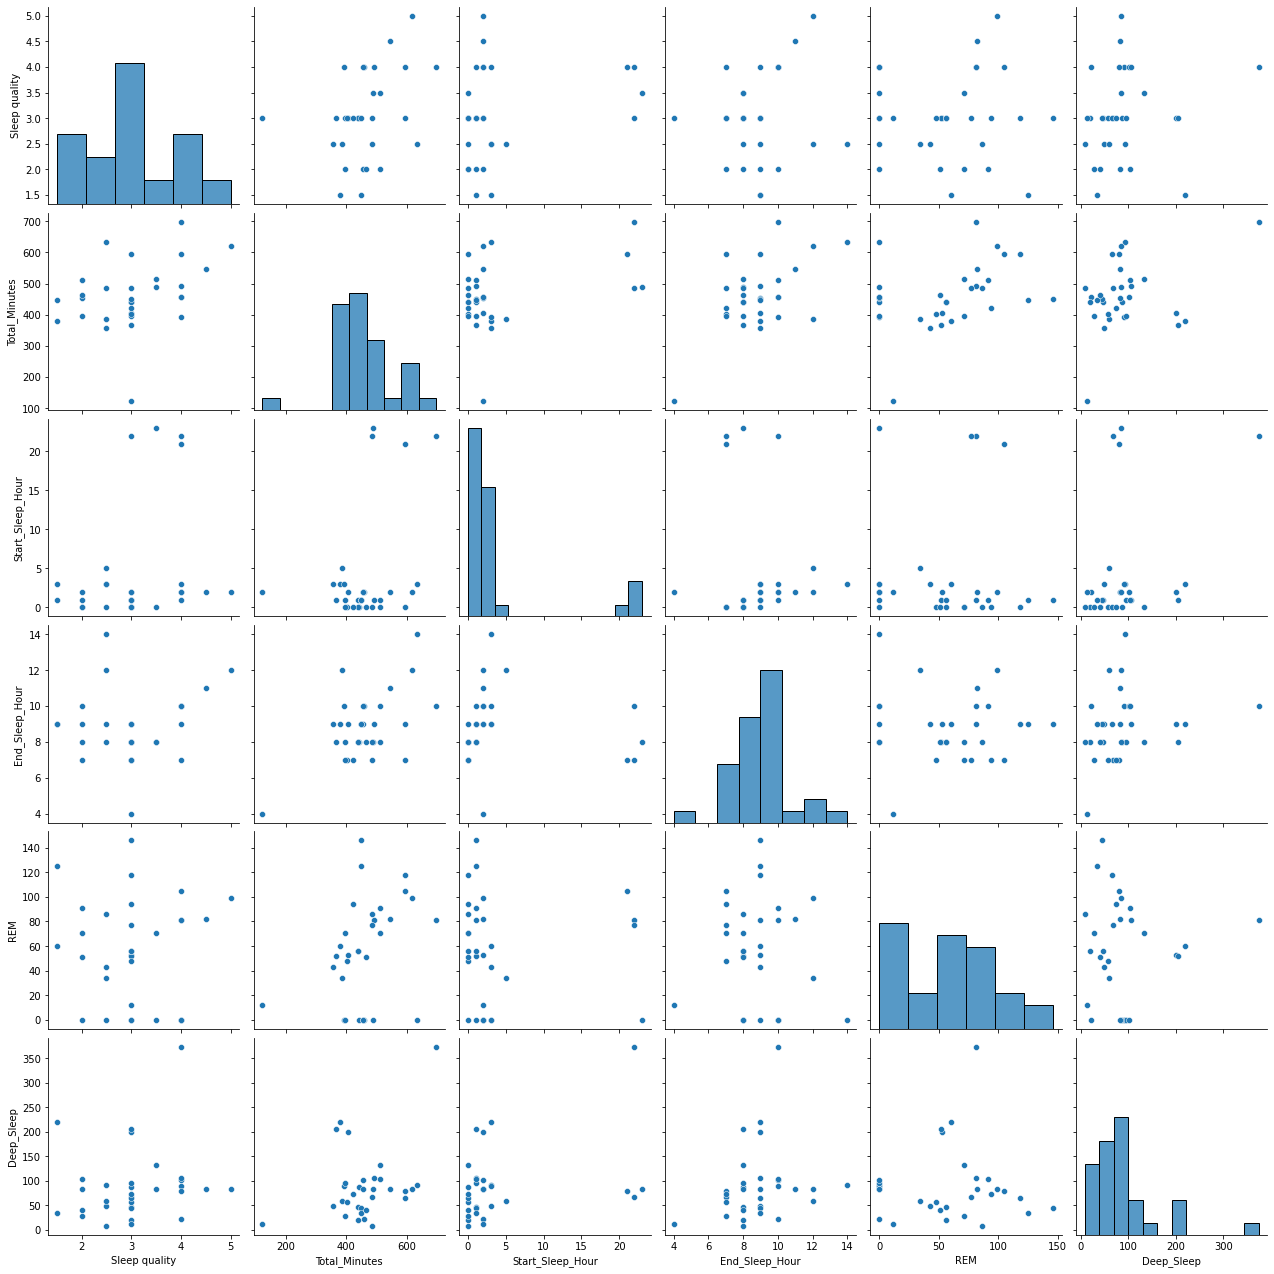

In [94]:
#cols = ['Sleep quality','Total_Minutes', 'Brightness_2H', 'Activity_Time_2H', 'Light_2H', 'Light_Sleep', 'Start_Sleep_Hour', 'End_Sleep_Hour']
cols = ['Sleep quality','Total_Minutes', 'Start_Sleep_Hour', 'End_Sleep_Hour', 'REM', 'Deep_Sleep']
sns.pairplot(df_res[cols], height=3)

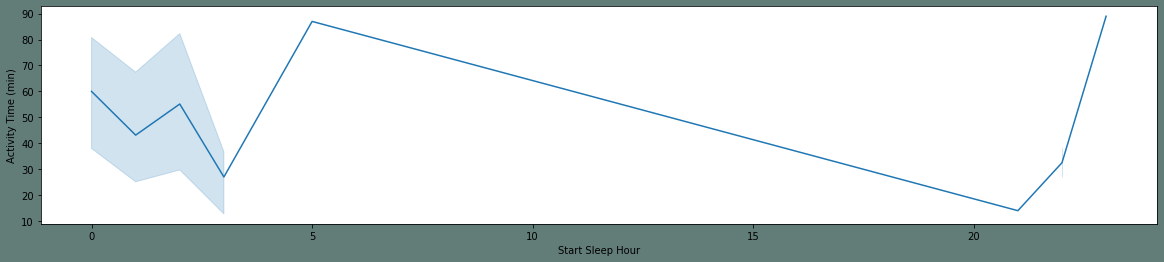

In [95]:
df = df_res.copy()

colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=df['Start_Sleep_Hour'],y="Activity_Time_2H",data=df, palette=colors)
Time_series.set_title("")
Time_series.set_ylabel("Activity Time (min)")
Time_series.set_xlabel("Start Sleep Hour")

# ML Models

In [96]:
# Mapping of target values
'''
mapper = {0: 'Péssimo', 0.5 : 'Horrível',
          1: 'Terrivel', 1.5 : 'Mau',
          2: 'Fraco', 2.5 : 'Razoavel',
          3: 'Médio', 3.5 : 'Bom', 
          4: 'Fantástico', 4.5 : 'Incrivel', 
          5: 'Excelente'}
'''

mapper = {0 : 0, 
          0.5 : 1,
          1 : 2, 
          1.5 : 3,
          2: 4,
          2.5 : 5,
          3: 6,
          3.5 : 7, 
          4: 8, 
          4.5 : 9, 
          5: 10}

# Categorico
df['Sleep quality'] = df['Sleep quality'].replace(mapper)

In [97]:
df['Sleep quality'] = df['Sleep quality'].astype('int')
df['Sleep quality'] 

In [98]:
# Dividing target from independent variables
X = df_res.drop('Sleep quality',axis=1)
y = df_res['Sleep quality']

# Splitting data in train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [101]:
df_res

,User_id,Activity_Time,Brightness,Light,Activity_Time_2H,Brightness_2H,Light_2H,Awake,Light_Sleep,Deep_Sleep,...,Total_Minutes,Start_Sleep_Day,Start_Sleep_Month,Start_Sleep_Hour,Start_Sleep_Minute,End_Sleep_Day,End_Sleep_Month,End_Sleep_Hour,End_Sleep_Minute,Sleep quality
0,1,114,38.0,18.000000,39,57.5,31.500000,4,99,220,...,379,25,4,3,9,25,4,9,32,1.5
1,1,143,48.0,14.000000,69,26.0,1.000000,0,355,87,...,442,27,4,0,53,27,4,8,15,3.0
2,1,145,46.5,3.500000,68,41.0,14.000000,0,435,22,...,457,28,4,2,49,28,4,10,26,4.0
3,1,317,41.0,10.000000,6,46.0,15.000000,25,542,92,...,634,29,4,3,5,29,4,14,4,2.5
4,1,64,54.0,1.000000,30,41.0,0.000000,0,301,90,...,391,30,4,3,48,30,4,10,19,4.0
5,1,151,44.0,9.000000,48,29.0,5.000000,0,301,95,...,396,2,5,1,45,2,5,8,21,3.0
6,1,167,43.0,8.000000,89,42.0,9.000000,2,405,84,...,489,2,5,23,59,3,5,8,10,3.5
7,1,539,60.0,13.000000,24,55.0,45.000000,0,371,83,...,454,4,5,2,17,4,5,9,51,2.0
8,1,187,45.0,20.000000,55,34.0,5.000000,0,354,102,...,456,5,5,2,28,5,5,10,44,4.0
9,2,100,694.0,4.995000,99,694.0,8.707500,12,152,200,...,406,25,4,2,26,25,4,9,25,3.0


**Decision Tree**

In [105]:
clf = DecisionTreeClassifier(max_depth=6,random_state=2021)
clf.fit(X_train,y_train)

ValueError: ValueError: Unknown label type: 'continuous'

In [157]:
# Prediction of model
pred_dtc = clf.predict(X_test)

**Random Forest**

In [103]:
# Model
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

ValueError: ValueError: Unknown label type: 'continuous'

In [104]:
# Prediction of model
pred_rfc = rfc.predict(X_test)

AttributeError: AttributeError: 'RandomForestClassifier' object has no attribute 'n_classes_'

## Results

**Decision Tree**

In [106]:
accuracy_score(y_test,pred_dtc)

NameError: NameError: name 'pred_dtc' is not defined

**Random Forest**

In [145]:
accuracy_score(y_test,pred_rfc)

0.4

**Confusion Matrix**

In [51]:
pred_rfc

NameError: NameError: name 'pred_rfc' is not defined

In [171]:

y_test

In [50]:
# Confusion Matrix
cm = confusion_matrix(y_test, pred_rfc)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0', '1', '2', '3', '4','5','6','7','8','9','10'])
cmd.plot()

NameError: NameError: name 'pred_rfc' is not defined

**Classification Report**

In [165]:
print("=== Classification Report ===")
print(classification_report(y_test, pred_rfc))

=== Classification Report ===
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.67      0.67      0.67         3
           8       0.00      0.00      0.00         0

    accuracy                           0.40         5
   macro avg       0.17      0.17      0.17         5
weighted avg       0.40      0.40      0.40         5



/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/pyth